In [30]:
# import the nessesary libraries required for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [31]:
# read the uber data from csv file to pandas dataframe
df = pd.read_csv('Uber Request Data.csv')
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [32]:
# find the information about the dataframe, check for nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


We can make the following observation after reviewing the data and information
1. The Request and Drop timestamps are provided in 2 differents formats (/ and -)
2. The data type of the Request and Drop timestaps are of type object

### Data Cleaning and Preparation

In [4]:
# Drop the 'Request id' column as it is not required for our analysis
df = df.drop(['Request id'], axis=1)

In [5]:
# Fix the Request and Drop timestamp columns
# Convert from object into datetime and fix the also differences in the format (- and /)
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True)
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True)
df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [6]:
# Check if there is any anomolies in the timestamps
# first check if the Request timestamp is greater than Drop time stamp
print("Total number of timestamps with anomolies = ", 
      ((df['Request timestamp'] >= df['Drop timestamp']) == True).sum())
print("Minimum Request and Drop timestamps - ", 
      min(df['Request timestamp']), ",", min(df['Drop timestamp']))
print("Maximum Request and Drop timestamps - ", 
      max(df['Request timestamp']),  ",", max(df['Drop timestamp']))

Total number of timestamps with anomolies =  0
Minimum Request and Drop timestamps -  2016-07-11 00:00:00 , 2016-07-11 00:51:00
Maximum Request and Drop timestamps -  2016-07-15 23:59:58 , 2016-07-16 01:09:24


In [7]:
# Feature engineering - create new columns identiying the Day name and Hour based on Request timestamp
df['Request day'] = df['Request timestamp'].dt.day_name()
df['Request hour'] = df['Request timestamp'].dt.hour

In [8]:
# Feature engineering - create new columns for each of the Status in numeric form 1 or 0
df['Trip Completed'] = df.apply(lambda x: 1 if x['Status'] == 'Trip Completed' else 0, axis = 1)
df['Unsuccessful Trip'] = df.apply(lambda x: 0 if x['Status'] == 'Trip Completed' else 1, axis = 1)
df['Cancelled'] = df.apply(lambda x: 1 if x['Status'] == 'Cancelled' else 0, axis = 1)
df['No Cars Available'] = df.apply(lambda x: 1 if x['Status'] == 'No Cars Available' else 0, axis = 1)
df['Demand'] = 1

In [9]:
#Print the top 5 rows of the dataframe to review the data cleanup and feature engineering
df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request day,Request hour,Trip Completed,Unsuccessful Trip,Cancelled,No Cars Available,Demand
0,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11,1,0,0,0,1
1,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17,1,0,0,0,1
2,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Tuesday,9,1,0,0,0,1
3,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Tuesday,21,1,0,0,0,1
4,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8,1,0,0,0,1


As part of the Data Cleaning and Preparation we did the following
1. Drop the Request id column
2. Fix the differences in format (/ or -) and convert the Request and Drop datastamp to datetime format.
3. Check if there is any anomolies in Request and Drop time. Also check the minimum and maximum timestamps for both.
4. Feature engineering 1 - Day and Hour
5. Feature engineering 2 - new columns based on Status identifiable using 1 or 0

### Data Analysis and Results Part 1 - Visually identify the most pressing problems for Uber.

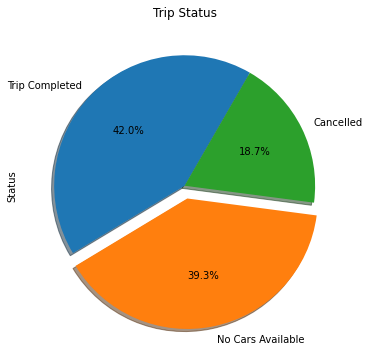

In [10]:
# Create a pie plot with annotations - to find the % of the 3 different Statuses
df['Status'].value_counts(normalize=True).plot.pie(figsize=(6,6), title = 'Trip Status',
                                                   autopct='%1.1f%%', explode=(0,0.1,0),
                                                   shadow=True, startangle=60)
plt.show()

we found that only 42% of the requests were successful, approx 40% is No cars available and 19% is Cancelled by the drivers

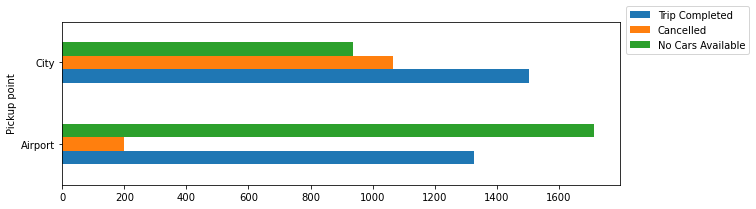

In [11]:
# Lets identify the problamatic types of requests 
# by plotting a bar chart for various statuses based on Pickup point
df.groupby('Pickup point')[['Trip Completed', 'Cancelled', 
                            'No Cars Available']].sum().plot.barh(figsize=[10,3])
plt.legend(loc=(1.01,0.8))
plt.show()

Following are the observations - 
1. Very high Cancellations in City compared to Airport.
2. No cars Available is extremely high in Airport.
3. Number of trips completed is higher for City to Airport.

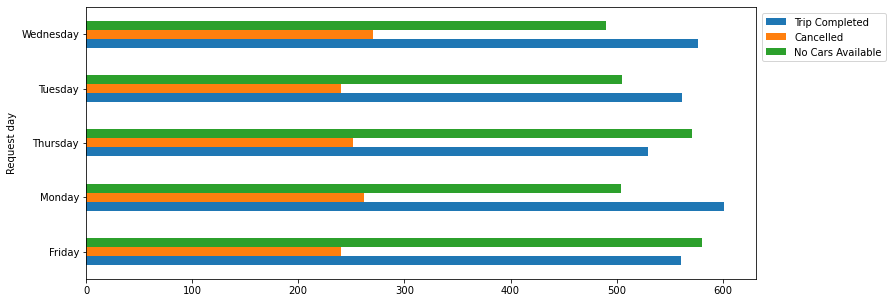

In [12]:
# Lets analyze the Trip status based on the week days
# Plot the bar chart for Trip status vs week day
df.groupby('Request day')[['Trip Completed', 'Cancelled', 
                            'No Cars Available']].sum().plot.barh(figsize=[12,5])
plt.legend(loc=(1.01,0.8))
plt.show()

Following are the observations -
1. Number of trips cancelled and trips completed on Mondays and Wednesdays are higher.
2. No cars available is higher on Fridays and Thursdays

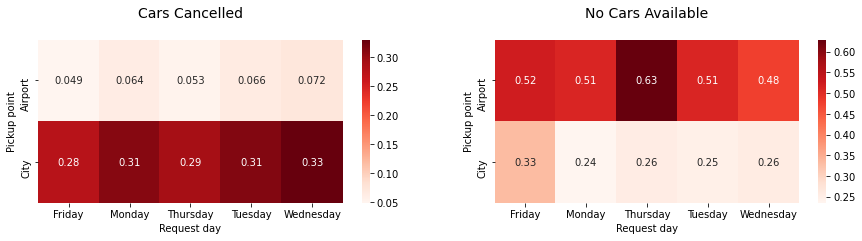

In [13]:
# Lets do a high level multi-variate analysis
# Lets further analyze the 'Cancelled' and 'No cars' statuses based on the week days and pick-up point
# 1 - Create the first subplot for analysing the Cancelled status
plt.figure(figsize=[15,3])
plt.subplot(1,2,1)
res = pd.pivot_table(data=df, index = 'Pickup point', columns='Request day', values='Cancelled')
plt.title("Cars Cancelled\n", fontsize=14)
sns.heatmap(res, annot=True, cmap='Reds')
# 2 - Create the second subplot for analysing the No cars available status
plt.subplot(1,2,2)
res = pd.pivot_table(data=df, index = 'Pickup point', columns='Request day', values='No Cars Available')
plt.title("No Cars Available\n", fontsize=14)
sns.heatmap(res, annot=True, cmap='Reds')
plt.show()

Following are the observations -
1. Cars Cancelled - 
 - very high from City on all days 
 - very low from Airport on almost all days
2. No Cars Available - 
 - very high from Airport on all days with Thursday being the highest.
 - Moderately high from City on almost all days with Friday being the highest

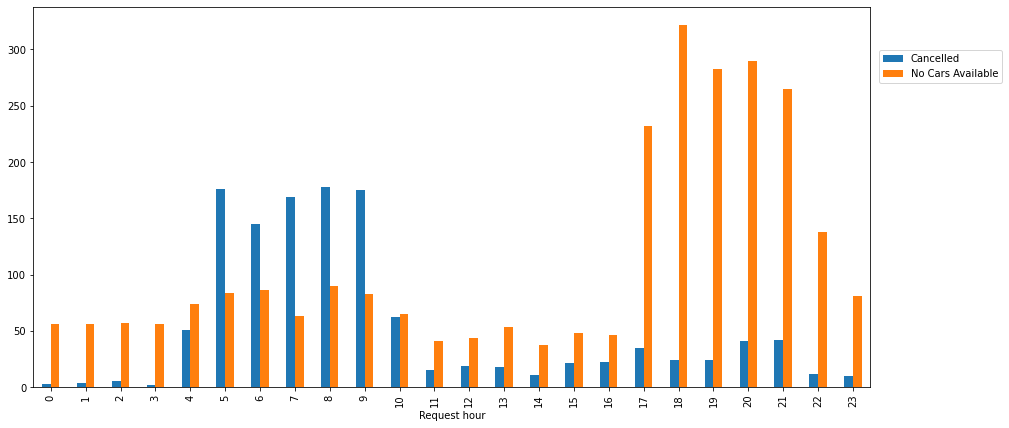

In [14]:
# Plot the various trip statuses based on the Request hour
df.groupby('Request hour')[['Cancelled', 
                            'No Cars Available']].sum().plot.bar(figsize=[15,7])
plt.legend(loc=(1.01,0.8))
plt.show()

Observation:
1. Cars cancelled were very high from early morning 4 am to 10 am.
2. No cars available were very high from 5 pm to late evenings upto 11 pm.

### Data Analysis Part 2 - Find out the gap between supply and demand and show the same using plots

Average Demand per day =  1349.0
Average Supply per day =  566.2


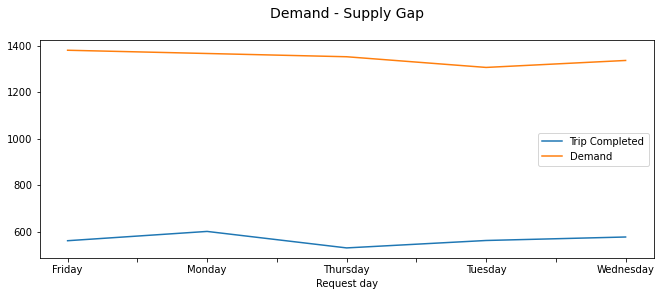

In [15]:
# Find the average Demand and Supply 
print("Average Demand per day = ", sum(df.groupby('Request day')['Demand'].sum()) / 5)
print("Average Supply per day = ", sum(df.groupby('Request day')['Trip Completed'].sum()) / 5)
# Plot the gap between Demand and Supply based on the weekdays
df.groupby('Request day')[['Trip Completed', 'Demand']].sum().plot.line(figsize = (11,4))
plt.title("Demand - Supply Gap\n", fontsize=14)
plt.show()

#### Part 2.1 - Find the time slots when the highest gap exists

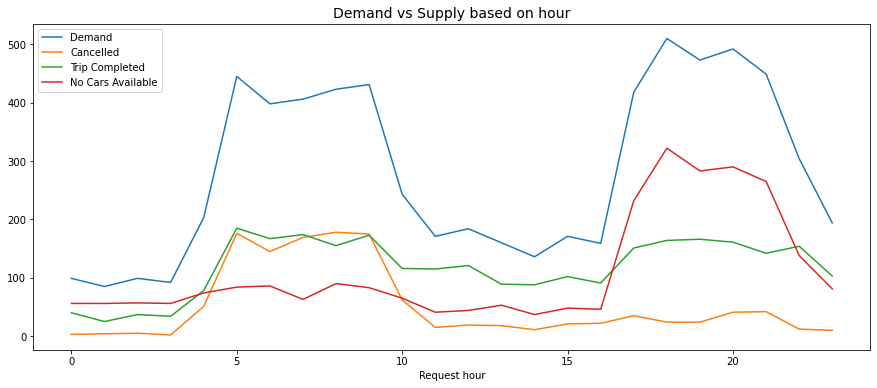

In [16]:
# Plot the Demand vs Supply on the hourly basis
df.groupby('Request hour')[['Demand', 'Cancelled', 'Trip Completed', 
                        'No Cars Available']].sum().plot.line(figsize = (15,6))
plt.title("Demand vs Supply based on hour", fontsize=14)
plt.show()

Observation - It is very clear that the demand is very high in the mornings and evenings (4 - 10 am and 4 - 10 pm)

#### Part 2.2  Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

In [17]:
# Create 2 seperate data frames for City and Airport for further analysis
City_pickups = df[df['Pickup point'] == 'City']
Airport_pickups = df[df['Pickup point'] == 'Airport']

##### City to Airport analysis

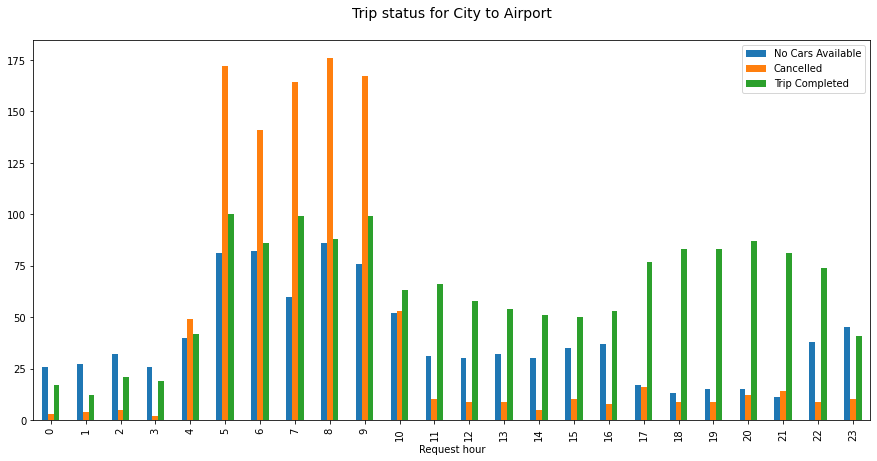

In [18]:
# Plot the Trip status for only the city pickups
City_pickups.groupby('Request hour')[['No Cars Available', 'Cancelled', 
                            'Trip Completed']].sum().plot.bar(figsize=[15,7])
plt.title("Trip status for City to Airport\n", fontsize=14)
plt.show()

In [19]:
# Find the center for Cancelled and No Cars - to be used in heatmap
City_pickups[['Cancelled', 'No Cars Available']].mean()

Cancelled            0.303964
No Cars Available    0.267180
dtype: float64

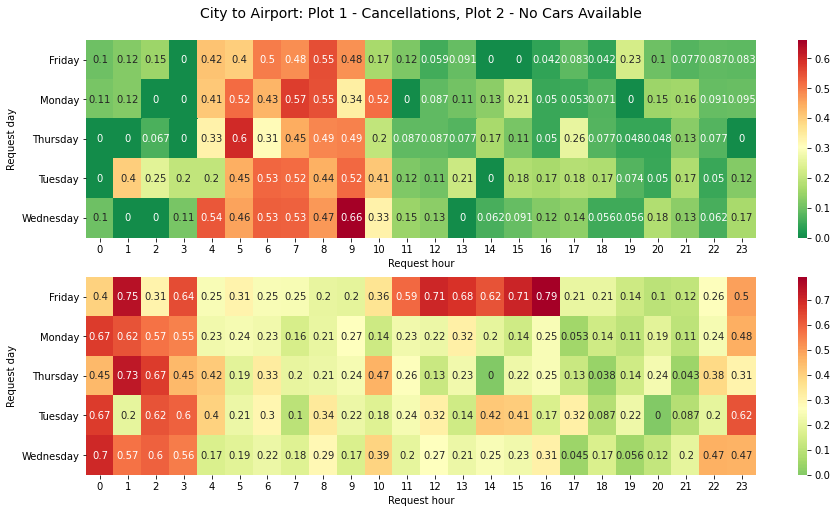

In [20]:
# Heatmap / multi-variate analysis - For City to Airport
# Lets further analyze the 'Cancelled' and 'No cars' statuses based on the week days and hours
# 1 - Create the first subplot for analysing the Cancelled status
plt.figure(figsize=[15,8])
plt.subplot(2,1,1)
res = pd.pivot_table(data=City_pickups, index = 'Request day', columns='Request hour', 
                     values='Cancelled')
plt.title("City to Airport: Plot 1 - Cancellations, Plot 2 - No Cars Available\n", fontsize=14)
sns.heatmap(res, annot=True, cmap='RdYlGn_r', center = 0.304)
# 2 - Create the second subplot for analysing the No Cars status
plt.subplot(2,1,2)
res = pd.pivot_table(data=City_pickups, index = 'Request day', columns='Request hour', 
                     values='No Cars Available')
sns.heatmap(res, annot=True, cmap='RdYlGn_r', center = 0.267)
plt.show()

In [21]:
#find the average cancellation from 4 to 9 am
city_4_10 = City_pickups[City_pickups['Request hour'] >= 4]
city_4_10 = city_4_10[city_4_10['Request hour'] <= 9]
print("Average cancellations from 4 am to 9 am =", 
      round(city_4_10['Cancelled'].mean() * 100), "%")

Average cancellations from 4 am to 9 am = 48 %


City to Airport observations - 
1. Cancellations - 
 - Cancellations were very high on all weekdays from 4 am to 10 am
 - Positively there were minimal cancellations before 4am or after 11am
2. No Cars Available - 
 - Car availability seems to be an issue almost throughout the day on all weekdays

##### Airport to City analysis

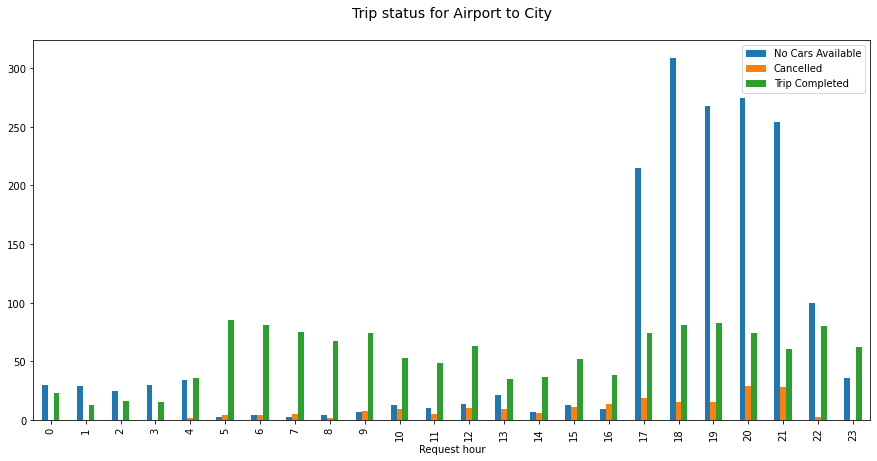

In [22]:
# Plot the Trip status for only the airport pickups
Airport_pickups.groupby('Request hour')[['No Cars Available', 'Cancelled', 
                            'Trip Completed']].sum().plot.bar(figsize=[15,7])
plt.title("Trip status for Airport to City\n", fontsize=14)
plt.show()

In [23]:
# Find the center for Cancelled and No Cars - to be used in heatmap
Airport_pickups[['Cancelled', 'No Cars Available']].mean()

Cancelled            0.061149
No Cars Available    0.529030
dtype: float64

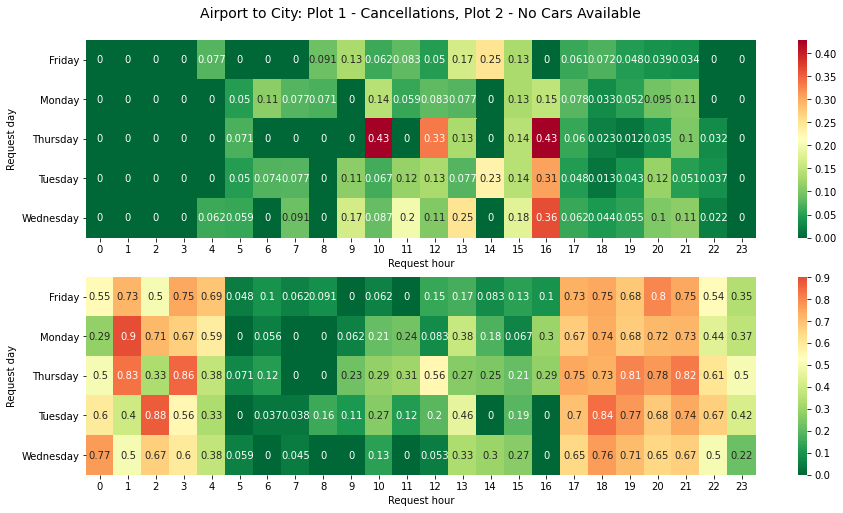

In [24]:
# Heatmap / multi-variate analysis - For Airport to City
# Lets further analyze the 'Cancelled' and 'No cars' statuses based on the week days and hours
# 1 - Create the first subplot for analysing the Cancelled status
plt.figure(figsize=[15,8])
plt.subplot(2,1,1)
res = pd.pivot_table(data=Airport_pickups, index = 'Request day', columns='Request hour', 
                     values='Cancelled')
plt.title("Airport to City: Plot 1 - Cancellations, Plot 2 - No Cars Available\n", fontsize=14)
sns.heatmap(res, annot=True, cmap='RdYlGn_r')
# 2 - Create the second subplot for analysing the No Cars status
plt.subplot(2,1,2)
res = pd.pivot_table(data=Airport_pickups, index = 'Request day', columns='Request hour', 
                     values='No Cars Available')
sns.heatmap(res, annot=True, cmap='RdYlGn_r', center = 0.529)
plt.show()

In [25]:
#find the average no cars available from 5 to 11 pm
air_5_10 = Airport_pickups[Airport_pickups['Request hour'] >= 17]
air_5_10 = air_5_10[air_5_10['Request hour'] <= 23]

print("Average no cars from 5 pm to 11 pm =", 
      round(air_5_10['No Cars Available'].mean() * 100), "%")

Average no cars from 5 pm to 11 pm = 70 %


Airport to City observations - 
1. Cancellations - 
 - There were almost no or negligible cancellations expect for few specific hours 
2. No Cars Available - 
 - Car availability seems to be an issue before 4 am or after 5 pm.
 - Car availability seems to be good from 5 am to 4 pm

##### Further analysis...

In [26]:
#Lets find the average trip time -
drop_time = df['Drop timestamp'] - df['Request timestamp']
drop_time = drop_time[~drop_time.isna()]
drop_time = pd.to_timedelta(drop_time).astype('timedelta64[m]').astype(int)
print("Average trip time - ", round(drop_time.mean()), "mins")

Average trip time -  52 mins


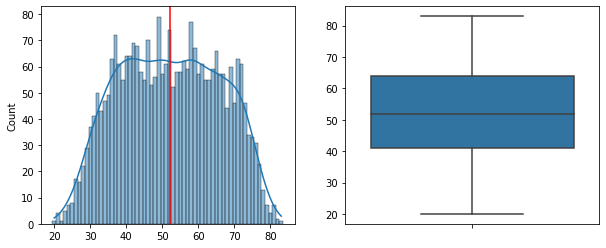

In [27]:
# Plot the distribution of average trip time 
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
sns.histplot(drop_time, discrete = True, kde=True)
plt.axvline(drop_time.mean(), color = 'red')
plt.subplot(1,2,2)
sns.boxplot(y=drop_time)
plt.show()

Observation - Trip duration seems to be normally distributed with Average trip time of 52 mins. 

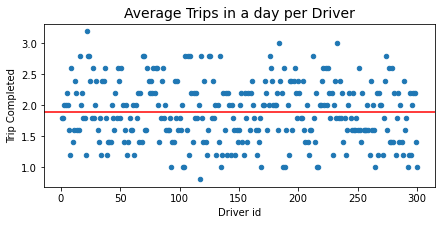

Average number of trips completed per driver in a day =  2 trips/day
Approximate trip duration per driver in a day =  2 hours/day

Average number of trips requested in a day =  5 trips/day
Approximate trip duration for driver to meets the daily request =  4 hours/day



In [28]:
# Create a scatter plot to find the distriution of the number of trips / driver
df3 = df.groupby('Driver id')['Trip Completed'].sum()
df5 = df3 / 5 
df5 = df5.reset_index()
df5.plot.scatter('Driver id', 'Trip Completed',figsize=(7,3))
plt.axhline(df5['Trip Completed'].mean(), color = 'red')
plt.title("Average Trips in a day per Driver", fontsize=14)
plt.show()

# Find the average number of trips per day for the drivers
avg_trip_driver = math.ceil((df['Trip Completed'].sum() / 5) / df['Driver id'].max())
avg_trip_requested = math.ceil((df['Demand'].sum() / 5) / df['Driver id'].max())

print("Average number of trips completed per driver in a day = ", avg_trip_driver, "trips/day")
print("Approximate trip duration per driver in a day = ", 
      round(avg_trip_driver * drop_time.mean() / 60), "hours/day\n")

print("Average number of trips requested in a day = ", avg_trip_requested, "trips/day")
print("Approximate trip duration for driver to meets the daily request = ", 
      round(avg_trip_requested * drop_time.mean() / 60), "hours/day\n")

Observation - 
1. Average number of trips per day is 2 per driver and if the the average number of trips is 50 mins - on an average a driver is only active for 100 mins or approx 2 hours a day
2. Average number of requests per driver is 5 trips and expected trip duration is 260 mins or approx 4 hours per day.

##### Identifying the problematic drivers for further one-to-one discussions

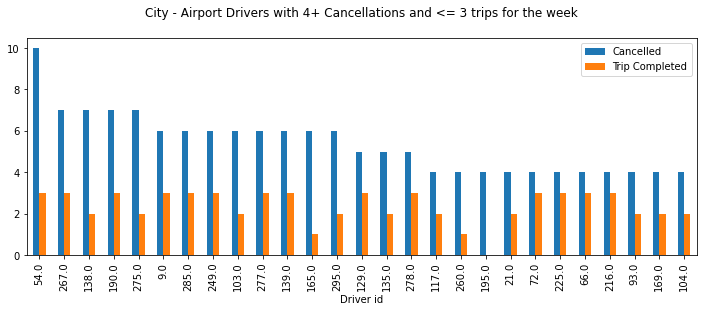

Number of drivers =  27


In [29]:
cdf = City_pickups.groupby('Driver id')[['Cancelled', 'Trip Completed']].sum()
cdf.sort_values(by='Cancelled', ascending=False, inplace=True)
# Plot the drivers with 4 or more Cancellations and 3 or less trips from City to Airport
cdf1 = cdf[cdf.Cancelled >= 4]
cdf1[cdf1['Trip Completed'] <= 3].plot.bar(figsize=[12,4])
plt.title("City - Airport Drivers with 4+ Cancellations and <= 3 trips for the week\n")
plt.show()
print("Number of drivers = ", len(cdf1[cdf1['Trip Completed'] <= 3]))

Observation - As we found out that the cancellations were very high from City - Airport earlier, we have identified the drivers who have cancelled more trips and accepted very less number of trips. There are total of 27 drivers who have 4+ Cancellations and <= 3 trips for the week. We can randomly have one to one meetings with them to understand the reason for higher number of cancellations.